In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
%matplotlib inline

lib_path = r'C:/Users/workspace/brad_public_workspace_on_win/brad_public_workspace_on_win/backtester/brad_vbacktester/'
file_path = 'C:/Users/workspace/brad_public_workspace_on_win/brad_public_workspace_on_win/backtester/brad_vbacktester/'
j9000_file = "j9000_hr.csv"
jm000_file = "jm000_hr.csv"

from sys import path
path.append(lib_path) #将存放module的路径添加进来

from metrics import expected_returns, win_loss_rate
from performance import sngl_performance
from data import process_sngl_data
from plot import plot_cum_returns
from strategies import Strat_SMA
from indicators import MACD

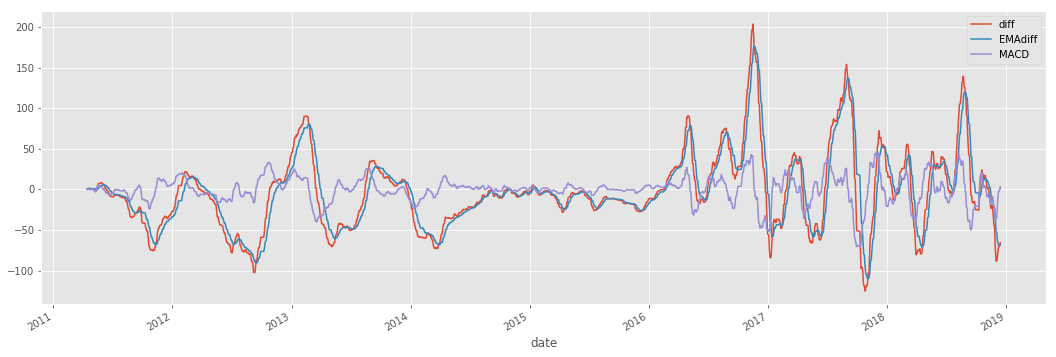

In [114]:
j9000 = process_sngl_data(file_path, j9000_file)
j9000_macd = MACD(j9000, 'close', 120, 260, 90)
j9000_macd[['diff', 'EMAdiff', 'MACD']].plot(figsize = (18, 6))

# Locate the signal change

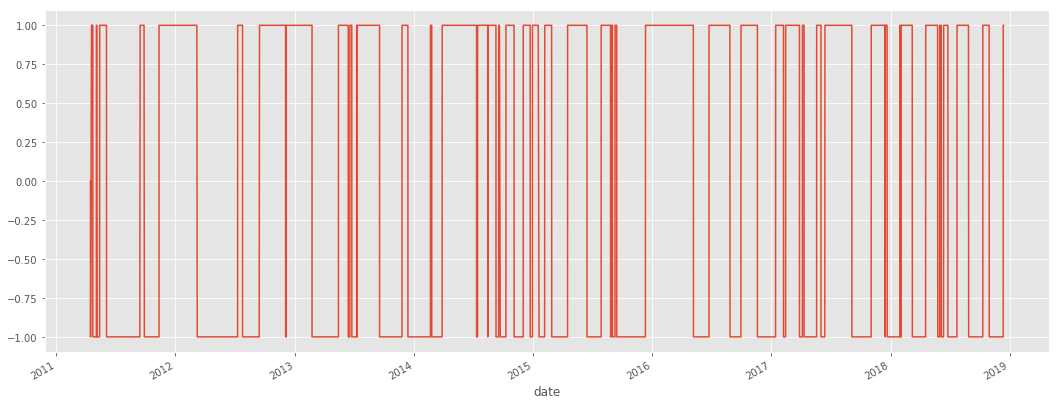

In [3]:
j9000_macd['signal'] = j9000_macd['MACD'].apply(lambda x: 1 if x>0 else -1 if x < 0 else 0)
j9000_macd['signal'].plot(figsize = (18, 7))

In [4]:
j9000_macd.head()

,date,open,high,low,close,volume,turnover,EMAfast,EMAslow,diff,EMAdiff,MACD,signal
date,,,,,,,,,,,,,
2011-04-15 09:00:00,2011/4/15 9:00,2275.0,2285.0,2250.0,2260.0,31834,6134,2260.000000,2260.000000,0.000000,0.000000,0.000000,0
2011-04-15 10:00:00,2011/4/15 10:00,2259.0,2265.0,2252.0,2256.0,6440,6184,2257.983333,2257.992308,-0.008974,-0.004537,-0.004437,-1
2011-04-15 11:00:00,2011/4/15 11:00,2256.0,2258.0,2228.0,2248.0,8264,6786,2254.599940,2254.635884,-0.035945,-0.015240,-0.020705,-1
2011-04-15 13:00:00,2011/4/15 13:00,2246.0,2251.0,2238.0,2240.0,4832,7534,2250.858203,2250.934587,-0.076384,-0.031039,-0.045345,-1
2011-04-15 14:00:00,2011/4/15 14:00,2241.0,2252.0,2239.0,2250.0,6710,6694,2250.680793,2250.744783,-0.063989,-0.037925,-0.026064,-1


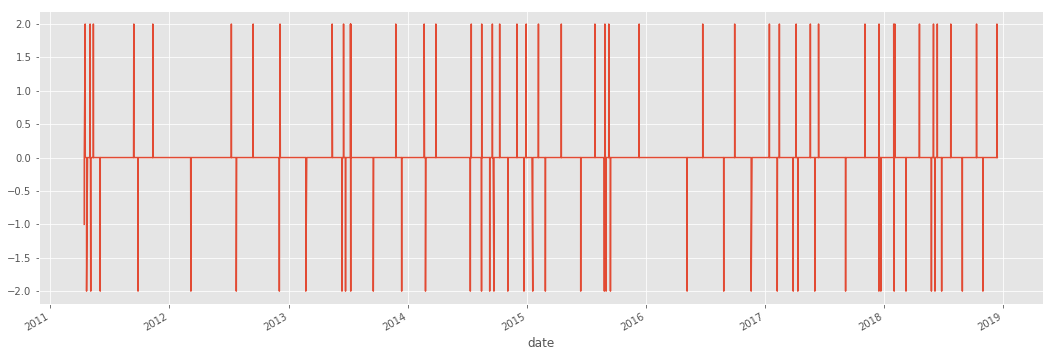

In [5]:
j9000_macd['next_signal'] = j9000_macd['signal'].shift(1)
j9000_macd['signal_chg'] = j9000_macd['signal'] - j9000_macd['next_signal']
j9000_macd['pre_signal'] = j9000_macd['signal'].shift(-1)
j9000_macd['signal_chg_'] = j9000_macd['signal'] - j9000_macd['pre_signal']
j9000_macd['signal_chg'].plot(figsize=(18, 6))

In [19]:
j9000_macd_sample = j9000_macd
j9000_macd_sample.dropna(inplace=True)
j9000_macd_sample.head(10)

,date,open,high,low,close,volume,turnover,EMAfast,EMAslow,diff,EMAdiff,MACD,signal,next_signal,signal_chg,pre_signal,signal_chg_
date,,,,,,,,,,,,,,,,,
2011-04-15 10:00:00,2011/4/15 10:00,2259.0,2265.0,2252.0,2256.0,6440,6184,2257.983333,2257.992308,-0.008974,-0.004537,-0.004437,-1,0.0,-1.0,-1.0,0.0
2011-04-15 11:00:00,2011/4/15 11:00,2256.0,2258.0,2228.0,2248.0,8264,6786,2254.599940,2254.635884,-0.035945,-0.015240,-0.020705,-1,-1.0,0.0,-1.0,0.0
2011-04-15 13:00:00,2011/4/15 13:00,2246.0,2251.0,2238.0,2240.0,4832,7534,2250.858203,2250.934587,-0.076384,-0.031039,-0.045345,-1,-1.0,0.0,-1.0,0.0
2011-04-15 14:00:00,2011/4/15 14:00,2241.0,2252.0,2239.0,2250.0,6710,6694,2250.680793,2250.744783,-0.063989,-0.037925,-0.026064,-1,-1.0,0.0,1.0,-2.0
2011-04-18 09:00:00,2011/4/18 9:00,2239.0,2331.0,2237.0,2331.0,30768,13342,2264.631245,2264.379194,0.252050,0.013128,0.238922,1,-1.0,2.0,1.0,0.0
2011-04-18 10:00:00,2011/4/18 10:00,2330.0,2368.0,2330.0,2345.0,30238,16404,2276.694463,2276.163932,0.530530,0.092061,0.438470,1,1.0,0.0,1.0,0.0
2011-04-18 11:00:00,2011/4/18 11:00,2346.0,2351.0,2330.0,2348.0,11708,15230,2286.136181,2285.387049,0.749132,0.180723,0.568409,1,1.0,0.0,1.0,0.0
2011-04-18 13:00:00,2011/4/18 13:00,2344.0,2386.0,2336.0,2375.0,28142,20388,2296.680877,2295.653151,1.027725,0.283414,0.744311,1,1.0,0.0,1.0,0.0
2011-04-18 14:00:00,2011/4/18 14:00,2375.0,2389.0,2366.0,2382.0,32780,19940,2305.866776,2304.589783,1.276993,0.392999,0.883995,1,1.0,0.0,1.0,0.0


In [20]:
date_dict = {}
for i, signal_chg in enumerate(j9000_macd_sample['signal_chg']):
    if j9000_macd_sample['signal_chg'][i] != 0 or j9000_macd_sample['signal_chg_'][i] != 0:
        if j9000_macd_sample['signal_chg'][i] != 0:
            date_dict[j9000_macd_sample['date'][i]] = j9000_macd_sample['signal_chg'][i]
        if j9000_macd_sample['signal_chg_'][i] != 0:
            date_dict[j9000_macd_sample['date'][i]] = j9000_macd_sample['signal_chg_'][i]

In [120]:
len(date_dict)

174

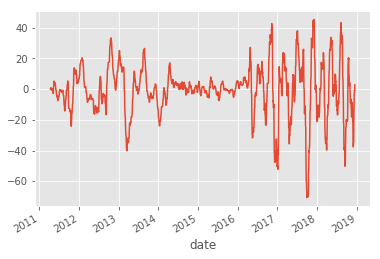

In [45]:
j9000_macd_sample['MACD'].plot()

In [23]:
j9000_macd_sample.head(5)

,date,open,high,low,close,volume,turnover,EMAfast,EMAslow,diff,EMAdiff,MACD,signal,next_signal,signal_chg,pre_signal,signal_chg_
date,,,,,,,,,,,,,,,,,
2011-04-15 10:00:00,2011/4/15 10:00,2259.0,2265.0,2252.0,2256.0,6440,6184,2257.983333,2257.992308,-0.008974,-0.004537,-0.004437,-1,0.0,-1.0,-1.0,0.0
2011-04-15 11:00:00,2011/4/15 11:00,2256.0,2258.0,2228.0,2248.0,8264,6786,2254.599940,2254.635884,-0.035945,-0.015240,-0.020705,-1,-1.0,0.0,-1.0,0.0
2011-04-15 13:00:00,2011/4/15 13:00,2246.0,2251.0,2238.0,2240.0,4832,7534,2250.858203,2250.934587,-0.076384,-0.031039,-0.045345,-1,-1.0,0.0,-1.0,0.0
2011-04-15 14:00:00,2011/4/15 14:00,2241.0,2252.0,2239.0,2250.0,6710,6694,2250.680793,2250.744783,-0.063989,-0.037925,-0.026064,-1,-1.0,0.0,1.0,-2.0
2011-04-18 09:00:00,2011/4/18 9:00,2239.0,2331.0,2237.0,2331.0,30768,13342,2264.631245,2264.379194,0.252050,0.013128,0.238922,1,-1.0,2.0,1.0,0.0


In [24]:
dates = list(date_dict.keys())
dates_df = pd.DataFrame(dates)
dates_df.columns = ['dates']
dates_df.index = dates_df['dates']

In [25]:
dates_df.sort_index()

,dates
dates,
2011/11/11 11:00,2011/11/11 11:00
2011/11/11 13:00,2011/11/11 13:00
2011/4/15 10:00,2011/4/15 10:00
2011/4/15 14:00,2011/4/15 14:00
2011/4/18 9:00,2011/4/18 9:00
2011/4/22 13:00,2011/4/22 13:00
2011/4/22 14:00,2011/4/22 14:00
2011/5/13 10:00,2011/5/13 10:00
2011/5/13 11:00,2011/5/13 11:00


In [26]:
from datetime import datetime as dt
dates_df['dates'] = dates_df['dates'].apply(lambda x: dt.strptime(x, '%Y/%m/%d %H:%M'))
dates_df['dates'][0]

Timestamp('2011-04-15 10:00:00')

In [14]:
# dates_dt = pd.to_datetime(dates_df['dates'])
# dates_df.sort_values('dates')

In [27]:
dates_df['dates_str'] = dates_df['dates'].astype(str)
dates_df

,dates,dates_str
dates,,
2011/4/15 10:00,2011-04-15 10:00:00,2011-04-15 10:00:00
2011/4/15 14:00,2011-04-15 14:00:00,2011-04-15 14:00:00
2011/4/18 9:00,2011-04-18 09:00:00,2011-04-18 09:00:00
2011/4/22 13:00,2011-04-22 13:00:00,2011-04-22 13:00:00
2011/4/22 14:00,2011-04-22 14:00:00,2011-04-22 14:00:00
2011/5/3 10:00,2011-05-03 10:00:00,2011-05-03 10:00:00
2011/5/3 11:00,2011-05-03 11:00:00,2011-05-03 11:00:00
2011/5/4 14:00,2011-05-04 14:00:00,2011-05-04 14:00:00
2011/5/5 9:00,2011-05-05 09:00:00,2011-05-05 09:00:00


In [28]:
dates_list = list(dates_df['dates_str'])
dates_list

['2011-04-15 10:00:00',
 '2011-04-15 14:00:00',
 '2011-04-18 09:00:00',
 '2011-04-22 13:00:00',
 '2011-04-22 14:00:00',
 '2011-05-03 10:00:00',
 '2011-05-03 11:00:00',
 '2011-05-04 14:00:00',
 '2011-05-05 09:00:00',
 '2011-05-13 10:00:00',
 '2011-05-13 11:00:00',
 '2011-06-03 11:00:00',
 '2011-06-03 13:00:00',
 '2011-09-13 14:00:00',
 '2011-09-14 09:00:00',
 '2011-09-26 14:00:00',
 '2011-09-27 09:00:00',
 '2011-11-11 11:00:00',
 '2011-11-11 13:00:00',
 '2012-03-06 14:00:00',
 '2012-03-07 09:00:00',
 '2012-07-09 10:00:00',
 '2012-07-09 11:00:00',
 '2012-07-24 13:00:00',
 '2012-07-24 14:00:00',
 '2012-09-13 14:00:00',
 '2012-09-14 09:00:00',
 '2012-12-03 11:00:00',
 '2012-12-03 13:00:00',
 '2012-12-05 13:00:00',
 '2012-12-05 14:00:00',
 '2013-02-22 13:00:00',
 '2013-02-22 14:00:00',
 '2013-05-14 13:00:00',
 '2013-05-14 14:00:00',
 '2013-06-13 13:00:00',
 '2013-06-13 14:00:00',
 '2013-06-18 09:00:00',
 '2013-06-18 10:00:00',
 '2013-06-24 10:00:00',
 '2013-06-24 11:00:00',
 '2013-07-09 13:

In [121]:
date_dict

{'2011/4/15 10:00': -1.0,
 '2011/4/15 14:00': -2.0,
 '2011/4/18 9:00': 2.0,
 '2011/4/22 13:00': 2.0,
 '2011/4/22 14:00': -2.0,
 '2011/5/3 10:00': -2.0,
 '2011/5/3 11:00': 2.0,
 '2011/5/4 14:00': 2.0,
 '2011/5/5 9:00': -2.0,
 '2011/5/13 10:00': -2.0,
 '2011/5/13 11:00': 2.0,
 '2011/6/3 11:00': 2.0,
 '2011/6/3 13:00': -2.0,
 '2011/9/13 14:00': -2.0,
 '2011/9/14 9:00': 2.0,
 '2011/9/26 14:00': 2.0,
 '2011/9/27 9:00': -2.0,
 '2011/11/11 11:00': -2.0,
 '2011/11/11 13:00': 2.0,
 '2012/3/6 14:00': 2.0,
 '2012/3/7 9:00': -2.0,
 '2012/7/9 10:00': -2.0,
 '2012/7/9 11:00': 2.0,
 '2012/7/24 13:00': 2.0,
 '2012/7/24 14:00': -2.0,
 '2012/9/13 14:00': -2.0,
 '2012/9/14 9:00': 2.0,
 '2012/12/3 11:00': 2.0,
 '2012/12/3 13:00': -2.0,
 '2012/12/5 13:00': -2.0,
 '2012/12/5 14:00': 2.0,
 '2013/2/22 13:00': 2.0,
 '2013/2/22 14:00': -2.0,
 '2013/5/14 13:00': -2.0,
 '2013/5/14 14:00': 2.0,
 '2013/6/13 13:00': 2.0,
 '2013/6/13 14:00': -2.0,
 '2013/6/18 9:00': -2.0,
 '2013/6/18 10:00': 2.0,
 '2013/6/24 10:00': 

In [58]:
# Debugging process 1: 
for i, date in enumerate(dates_list):
    try:
        diff_sample_real_macd = j9000_macd[dates_list[2*i]:dates_list[2*i+1]]['MACD'].max() - \
        j9000_macd_sample[dates_list[2*i]:dates_list[2*i+1]]['MACD'].max()
        print ("========================================================================")
        print (dates_list[2*i], "to", dates_list[2*i+1], "Diff between sampled and real MACD: ", diff_sample_real_macd)
        print (dates_list[2*i], "to", dates_list[2*i+1], "Sampled MACD", j9000_macd_sample[dates_list[2*i]:dates_list[2*i+1]]['MACD'].max())
        print (dates_list[2*i], "to", dates_list[2*i+1], "Real MACD", j9000_macd[dates_list[2*i]:dates_list[2*i+1]]['MACD'].max())
        
    except IndexError:
        pass

2011-04-15 10:00:00 to 2011-04-15 14:00:00 Diff between sampled and real MACD:  0.0
2011-04-15 10:00:00 to 2011-04-15 14:00:00 Sampled MACD -0.0044373219374822135
2011-04-15 10:00:00 to 2011-04-15 14:00:00 Real MACD -0.0044373219374822135
2011-04-18 09:00:00 to 2011-04-22 13:00:00 Diff between sampled and real MACD:  0.0
2011-04-18 09:00:00 to 2011-04-22 13:00:00 Sampled MACD 0.8992413603391649
2011-04-18 09:00:00 to 2011-04-22 13:00:00 Real MACD 0.8992413603391649
2011-04-22 14:00:00 to 2011-05-03 10:00:00 Diff between sampled and real MACD:  0.0
2011-04-22 14:00:00 to 2011-05-03 10:00:00 Sampled MACD -0.01170734892862968
2011-04-22 14:00:00 to 2011-05-03 10:00:00 Real MACD -0.01170734892862968
2011-05-03 11:00:00 to 2011-05-04 14:00:00 Diff between sampled and real MACD:  0.0
2011-05-03 11:00:00 to 2011-05-04 14:00:00 Sampled MACD 0.20388580447809868
2011-05-03 11:00:00 to 2011-05-04 14:00:00 Real MACD 0.20388580447809868
2011-05-05 09:00:00 to 2011-05-13 10:00:00 Diff between sample

2014-12-30 10:00:00 to 2014-12-30 11:00:00 Sampled MACD 0.1084993258241207
2014-12-30 10:00:00 to 2014-12-30 11:00:00 Real MACD 0.1084993258241207
2015-01-17 02:00:00 to 2015-01-19 09:00:00 Diff between sampled and real MACD:  0.0
2015-01-17 02:00:00 to 2015-01-19 09:00:00 Sampled MACD 0.038066950949686706
2015-01-17 02:00:00 to 2015-01-19 09:00:00 Real MACD 0.038066950949686706
2015-02-05 14:00:00 to 2015-02-05 21:00:00 Diff between sampled and real MACD:  0.0
2015-02-05 14:00:00 to 2015-02-05 21:00:00 Sampled MACD 0.04845766339384472
2015-02-05 14:00:00 to 2015-02-05 21:00:00 Real MACD 0.04845766339384472
2015-02-27 01:00:00 to 2015-02-27 02:00:00 Diff between sampled and real MACD:  0.0
2015-02-27 01:00:00 to 2015-02-27 02:00:00 Sampled MACD 0.0021452805049921864
2015-02-27 01:00:00 to 2015-02-27 02:00:00 Real MACD 0.0021452805049921864
2015-04-16 22:00:00 to 2015-04-16 23:00:00 Diff between sampled and real MACD:  0.0
2015-04-16 22:00:00 to 2015-04-16 23:00:00 Sampled MACD 0.018816

2017-12-21 11:00:00 to 2017-12-21 13:00:00 Sampled MACD 0.17847069317480901
2017-12-21 11:00:00 to 2017-12-21 13:00:00 Real MACD 0.17847069317480901
2018-01-29 22:00:00 to 2018-01-29 23:00:00 Diff between sampled and real MACD:  0.0
2018-01-29 22:00:00 to 2018-01-29 23:00:00 Sampled MACD 0.19568197898338813
2018-01-29 22:00:00 to 2018-01-29 23:00:00 Real MACD 0.19568197898338813
2018-01-30 23:00:00 to 2018-01-31 09:00:00 Diff between sampled and real MACD:  0.0
2018-01-30 23:00:00 to 2018-01-31 09:00:00 Sampled MACD 0.22287757729362756
2018-01-30 23:00:00 to 2018-01-31 09:00:00 Real MACD 0.22287757729362756
2018-02-02 10:00:00 to 2018-02-02 11:00:00 Diff between sampled and real MACD:  0.0
2018-02-02 10:00:00 to 2018-02-02 11:00:00 Sampled MACD 0.1596604932150667
2018-02-02 10:00:00 to 2018-02-02 11:00:00 Real MACD 0.1596604932150667
2018-03-08 13:00:00 to 2018-03-08 14:00:00 Diff between sampled and real MACD:  0.0
2018-03-08 13:00:00 to 2018-03-08 14:00:00 Sampled MACD 0.189757698625

In [165]:
# Debugging process 2:
all_slides_df = []
date_pairs = 0
all_date_pairs = len(dates_list)/2
for i, date in enumerate(dates_list):
    if date_pairs < all_date_pairs:
        print ("date_pairs", date_pairs)
        try:
            print ("=======================================================")
            print ("i: ", i)
            each_slice = j9000_macd_sample[dates_list[2*i]:dates_list[2*i+1]]['MACD']
            print (each_slice)
            all_slides_df.append(pd.DataFrame(each_slice))
            print ("2*{}: ".format(2*i), "2*{}+1".format(2*i+1))
            print (dates_list[2*i], "to", dates_list[2*i+1])
#             each_slice = j9000_macd_sample[dates_list[2*i]:dates_list[2*i+1]]['MACD']
#             print ("MACD===", each_slice)
#             if each_slice[0] < 0:
#                 min_value = each_slice.min()
#                 min_value_df = pd.DataFrame(each_slice)
#                 min_value_df['min_values'] = min_value
#                 all_slides_df = all_slides_df.append(min_value_df)
#                 print ("Min Value:", min_value)
#             if each_slice[0] > 0:
#                 max_value = each_slice.max()
#                 max_value_df = pd.DataFrame(each_slice)
#                 max_value_df['max_values'] = max_value
#                 all_slides_df = all_slides_df.append(max_value_df)
#                 print ("Max Value:", max_value)
            date_pairs = date_pairs + 1
            
        except IndexError:
            pass
        
    else:
        pass

date_pairs 0
i:  0
date
2011-04-15 10:00:00   -0.004437
2011-04-15 11:00:00   -0.020705
2011-04-15 13:00:00   -0.045345
2011-04-15 14:00:00   -0.026064
Name: MACD, dtype: float64
2*0:  2*1+1
2011-04-15 10:00:00 to 2011-04-15 14:00:00
date_pairs 1
i:  1
date
2011-04-18 09:00:00    0.238922
2011-04-18 10:00:00    0.438470
2011-04-18 11:00:00    0.568409
2011-04-18 13:00:00    0.744311
2011-04-18 14:00:00    0.883995
2011-04-19 09:00:00    0.899241
2011-04-19 10:00:00    0.819799
2011-04-19 11:00:00    0.707924
2011-04-19 13:00:00    0.686842
2011-04-19 14:00:00    0.620143
2011-04-20 09:00:00    0.607434
2011-04-20 10:00:00    0.538984
2011-04-20 11:00:00    0.521479
2011-04-20 13:00:00    0.482689
2011-04-20 14:00:00    0.464738
2011-04-21 09:00:00    0.503452
2011-04-21 10:00:00    0.503371
2011-04-21 11:00:00    0.461414
2011-04-21 13:00:00    0.436577
2011-04-21 14:00:00    0.377538
2011-04-22 09:00:00    0.189872
2011-04-22 10:00:00    0.124618
2011-04-22 11:00:00    0.057597
2011-0

date
2017-02-13 10:00:00   -0.640109
2017-02-13 11:00:00    0.116363
Name: MACD, dtype: float64
2*120:  2*121+1
2017-02-13 10:00:00 to 2017-02-13 11:00:00
date_pairs 61
i:  61
date
2017-03-27 21:00:00    0.361969
2017-03-27 22:00:00   -0.402495
Name: MACD, dtype: float64
2*122:  2*123+1
2017-03-27 21:00:00 to 2017-03-27 22:00:00
date_pairs 62
i:  62
date
2017-04-05 21:00:00   -0.028894
2017-04-05 22:00:00    0.579677
Name: MACD, dtype: float64
2*124:  2*125+1
2017-04-05 21:00:00 to 2017-04-05 22:00:00
date_pairs 63
i:  63
date
2017-04-10 22:00:00    0.271411
2017-04-10 23:00:00   -0.349595
Name: MACD, dtype: float64
2*126:  2*127+1
2017-04-10 22:00:00 to 2017-04-10 23:00:00
date_pairs 64
i:  64
date
2017-05-19 10:00:00   -0.194127
2017-05-19 11:00:00    0.331828
Name: MACD, dtype: float64
2*128:  2*129+1
2017-05-19 10:00:00 to 2017-05-19 11:00:00
date_pairs 65
i:  65
date
2017-06-01 21:00:00    0.605927
2017-06-01 22:00:00   -0.026948
Name: MACD, dtype: float64
2*130:  2*131+1
2017-06-

In [172]:
dates_list

['2011-04-15 10:00:00',
 '2011-04-15 14:00:00',
 '2011-04-18 09:00:00',
 '2011-04-22 13:00:00',
 '2011-04-22 14:00:00',
 '2011-05-03 10:00:00',
 '2011-05-03 11:00:00',
 '2011-05-04 14:00:00',
 '2011-05-05 09:00:00',
 '2011-05-13 10:00:00',
 '2011-05-13 11:00:00',
 '2011-06-03 11:00:00',
 '2011-06-03 13:00:00',
 '2011-09-13 14:00:00',
 '2011-09-14 09:00:00',
 '2011-09-26 14:00:00',
 '2011-09-27 09:00:00',
 '2011-11-11 11:00:00',
 '2011-11-11 13:00:00',
 '2012-03-06 14:00:00',
 '2012-03-07 09:00:00',
 '2012-07-09 10:00:00',
 '2012-07-09 11:00:00',
 '2012-07-24 13:00:00',
 '2012-07-24 14:00:00',
 '2012-09-13 14:00:00',
 '2012-09-14 09:00:00',
 '2012-12-03 11:00:00',
 '2012-12-03 13:00:00',
 '2012-12-05 13:00:00',
 '2012-12-05 14:00:00',
 '2013-02-22 13:00:00',
 '2013-02-22 14:00:00',
 '2013-05-14 13:00:00',
 '2013-05-14 14:00:00',
 '2013-06-13 13:00:00',
 '2013-06-13 14:00:00',
 '2013-06-18 09:00:00',
 '2013-06-18 10:00:00',
 '2013-06-24 10:00:00',
 '2013-06-24 11:00:00',
 '2013-07-09 13:

In [173]:
date_dict

{'2011/4/15 10:00': -1.0,
 '2011/4/15 14:00': -2.0,
 '2011/4/18 9:00': 2.0,
 '2011/4/22 13:00': 2.0,
 '2011/4/22 14:00': -2.0,
 '2011/5/3 10:00': -2.0,
 '2011/5/3 11:00': 2.0,
 '2011/5/4 14:00': 2.0,
 '2011/5/5 9:00': -2.0,
 '2011/5/13 10:00': -2.0,
 '2011/5/13 11:00': 2.0,
 '2011/6/3 11:00': 2.0,
 '2011/6/3 13:00': -2.0,
 '2011/9/13 14:00': -2.0,
 '2011/9/14 9:00': 2.0,
 '2011/9/26 14:00': 2.0,
 '2011/9/27 9:00': -2.0,
 '2011/11/11 11:00': -2.0,
 '2011/11/11 13:00': 2.0,
 '2012/3/6 14:00': 2.0,
 '2012/3/7 9:00': -2.0,
 '2012/7/9 10:00': -2.0,
 '2012/7/9 11:00': 2.0,
 '2012/7/24 13:00': 2.0,
 '2012/7/24 14:00': -2.0,
 '2012/9/13 14:00': -2.0,
 '2012/9/14 9:00': 2.0,
 '2012/12/3 11:00': 2.0,
 '2012/12/3 13:00': -2.0,
 '2012/12/5 13:00': -2.0,
 '2012/12/5 14:00': 2.0,
 '2013/2/22 13:00': 2.0,
 '2013/2/22 14:00': -2.0,
 '2013/5/14 13:00': -2.0,
 '2013/5/14 14:00': 2.0,
 '2013/6/13 13:00': 2.0,
 '2013/6/13 14:00': -2.0,
 '2013/6/18 9:00': -2.0,
 '2013/6/18 10:00': 2.0,
 '2013/6/24 10:00': 

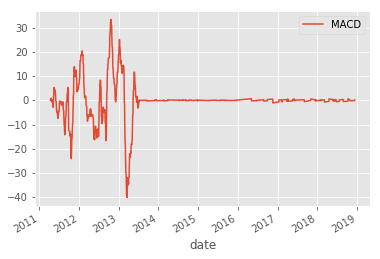

In [160]:
pd.concat(all_slides_df).plot()

In [117]:
rng

range(0, 173)

In [130]:
# This is the OG version:
# Problem found: 2013-7-9
all_slides_df = pd.DataFrame([])

# rng = range(len(dates)-1)
for i, date in enumerate(dates_list):
    try:
        print ("=======================================================")
#         print (dates_list[2*i], "to", dates_list[2*i+1])
        each_slice = j9000_macd_sample[dates_list[2*i]:dates_list[2*i+1]]['MACD']
        if each_slice[0] < 0 and each_slice[0]*each_slice[-1]>0:
#             each_slice = j9000_macd_sample[dates_list[2*i]:dates_list[2*i+1]]['MACD']
#             print ("==========")
            print (each_slice)
            min_value = each_slice.min()
            min_value_df = pd.DataFrame(each_slice)
            min_value_df['min_values'] = min_value
            all_slides_df = pd.concat([all_slides_df, min_value_df])
#             each_slice['min_values'] = min_value
            print ("多个值，Min Value:", min_value)
        if each_slice[0] > 0 and each_slice[0]*each_slice[-1]>0:
#             each_slice = j9000_macd_sample[dates_list[2*i]:dates_list[2*i+1]]['MACD']
#             print ("==========")
            print (each_slice)
            max_value = each_slice.max()
            max_value_df = pd.DataFrame(each_slice)
            max_value_df['max_values'] = max_value
            all_slides_df = pd.concat([all_slides_df, max_value_df])
#             each_slice['max_values'] = max_value
            print ("多个值，Max Value:", max_value)
        if each_slice[0] < 0 and each_slice[0]*each_slice[-1]<0:
            print ("each_slice[0]: ",each_slice[0])
            print ("each_slice[0]*each_slice[-1]: ",each_slice[0]*each_slice[-1])
            each_slice = j9000_macd_sample[dates_list[2*i]:dates_list[2*i]]['MACD']
#             print ("==========")
            print (each_slice)
            min_value = pd.DataFrame(each_slice)
            all_slides_df = pd.concat([all_slides_df, min_value])
            print ("只有一个值，Min Value: ", min_value)
        if each_slice[0] > 0 and each_slice[0]*each_slice[-1]<0:
            print ("each_slice[0]: ",each_slice[0])
            print ("each_slice[0]*each_slice[-1]: ",each_slice[0]*each_slice[-1])
            each_slice = j9000_macd_sample[dates_list[2*i]:dates_list[2*i]]['MACD']
#             print ("==========")
            print (each_slice)
            max_value = pd.DataFrame(each_slice)
            all_slides_df = pd.concat([all_slides_df, max_value])
            print ("只有一个值，Max Value: ", max_value)
    except IndexError:
        pass

date
2011-04-15 10:00:00   -0.004437
2011-04-15 11:00:00   -0.020705
2011-04-15 13:00:00   -0.045345
2011-04-15 14:00:00   -0.026064
Name: MACD, dtype: float64
多个值，Min Value: -0.04534496276594076
date
2011-04-18 09:00:00    0.238922
2011-04-18 10:00:00    0.438470
2011-04-18 11:00:00    0.568409
2011-04-18 13:00:00    0.744311
2011-04-18 14:00:00    0.883995
2011-04-19 09:00:00    0.899241
2011-04-19 10:00:00    0.819799
2011-04-19 11:00:00    0.707924
2011-04-19 13:00:00    0.686842
2011-04-19 14:00:00    0.620143
2011-04-20 09:00:00    0.607434
2011-04-20 10:00:00    0.538984
2011-04-20 11:00:00    0.521479
2011-04-20 13:00:00    0.482689
2011-04-20 14:00:00    0.464738
2011-04-21 09:00:00    0.503452
2011-04-21 10:00:00    0.503371
2011-04-21 11:00:00    0.461414
2011-04-21 13:00:00    0.436577
2011-04-21 14:00:00    0.377538
2011-04-22 09:00:00    0.189872
2011-04-22 10:00:00    0.124618
2011-04-22 11:00:00    0.057597
2011-04-22 13:00:00    0.021007
Name: MACD, dtype: float64
多个值，

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\U


只有一个值，Max Value:                           MACD
date                         
2014-02-24 13:00:00  0.034681
each_slice[0]:  -0.1048318575496836
each_slice[0]*each_slice[-1]:  -0.020252884273933902
date
2014-03-28 09:00:00   -0.104832
Name: MACD, dtype: float64
只有一个值，Min Value:                           MACD
date                         
2014-03-28 09:00:00 -0.104832
each_slice[0]:  0.0673687639206122
each_slice[0]*each_slice[-1]:  -0.0017285296680290628
date
2014-07-12    0.067369
Name: MACD, dtype: float64
只有一个值，Max Value:                  MACD
date                
2014-07-12  0.067369
each_slice[0]:  -0.07373790814213166
each_slice[0]*each_slice[-1]:  -0.0024450026971958166
date
2014-07-14 23:00:00   -0.073738
Name: MACD, dtype: float64
只有一个值，Min Value:                           MACD
date                         
2014-07-14 23:00:00 -0.073738
each_slice[0]:  0.12784052456619932
each_slice[0]*each_slice[-1]:  -0.00030523539084462435
date
2014-08-15 02:00:00    0.127841
Name: MACD, dt

Name: MACD, dtype: float64
只有一个值，Max Value:                           MACD
date                         
2018-06-05 10:00:00  0.046927
each_slice[0]:  -0.20495681844231228
each_slice[0]*each_slice[-1]:  -0.07394724057238371
date
2018-06-12 13:00:00   -0.204957
Name: MACD, dtype: float64
只有一个值，Min Value:                           MACD
date                         
2018-06-12 13:00:00 -0.204957
each_slice[0]:  0.1565739984613117
each_slice[0]*each_slice[-1]:  -0.08767787189225303
date
2018-06-25 21:00:00    0.156574
Name: MACD, dtype: float64
只有一个值，Max Value:                           MACD
date                         
2018-06-25 21:00:00  0.156574
each_slice[0]:  -0.41326525385784585
each_slice[0]*each_slice[-1]:  -0.10208668351268267
date
2018-07-23 14:00:00   -0.413265
Name: MACD, dtype: float64
只有一个值，Min Value:                           MACD
date                         
2018-07-23 14:00:00 -0.413265
each_slice[0]:  0.3419380057307393
each_slice[0]*each_slice[-1]:  -0.146713889417193

In [105]:
each_slice

date
2018-12-12 09:00:00   -0.062436
Name: MACD, dtype: float64

In [106]:
all_slides_df['zero'] = 0

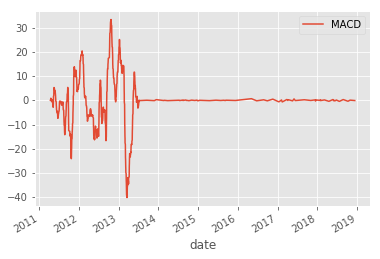

In [107]:
pd.DataFrame(all_slides_df['MACD']).plot()

In [108]:
all_slides_df.index

DatetimeIndex(['2011-04-15 10:00:00', '2011-04-15 11:00:00',
               '2011-04-15 13:00:00', '2011-04-15 14:00:00',
               '2011-04-18 09:00:00', '2011-04-18 10:00:00',
               '2011-04-18 11:00:00', '2011-04-18 13:00:00',
               '2011-04-18 14:00:00', '2011-04-19 09:00:00',
               ...
               '2018-05-25 11:00:00', '2018-05-31 14:00:00',
               '2018-06-05 10:00:00', '2018-06-12 13:00:00',
               '2018-06-25 21:00:00', '2018-07-23 14:00:00',
               '2018-08-27 23:00:00', '2018-10-10 21:00:00',
               '2018-10-30 09:00:00', '2018-12-12 09:00:00'],
              dtype='datetime64[ns]', name='date', length=2769, freq=None)

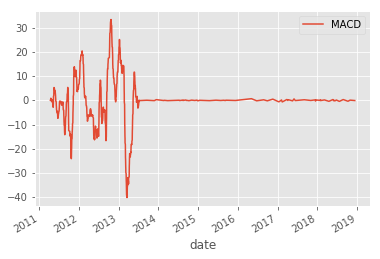

In [110]:
pd.DataFrame(all_slides_df['MACD']).plot()

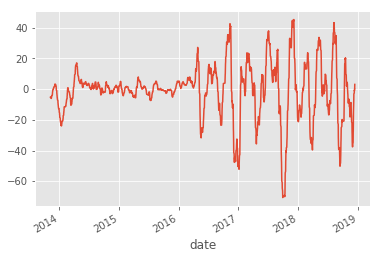

In [132]:
j9000_macd['MACD'].tail(10000).plot()

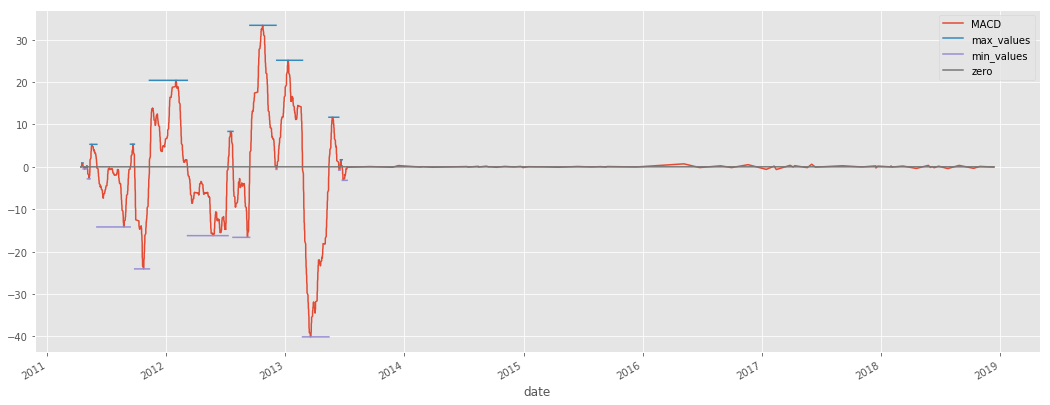

In [113]:
all_slides_df.plot(figsize=(18, 7))

In [71]:
all_slides_df.tail(200)

,MACD,max_values,min_values,zero
date,,,,
2013-06-20 10:00:00,1.628745,1.673423,NaN,0
2013-06-20 11:00:00,1.538799,1.673423,NaN,0
2013-06-20 13:00:00,1.327658,1.673423,NaN,0
2013-06-20 14:00:00,1.122371,1.673423,NaN,0
2013-06-21 09:00:00,0.836089,1.673423,NaN,0
2013-06-21 10:00:00,0.758834,1.673423,NaN,0
2013-06-21 11:00:00,0.603661,1.673423,NaN,0
2013-06-21 13:00:00,0.426244,1.673423,NaN,0
2013-06-21 14:00:00,0.288407,1.673423,NaN,0


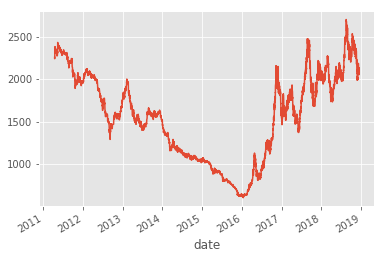

In [34]:
j9000_macd['close'].plot()

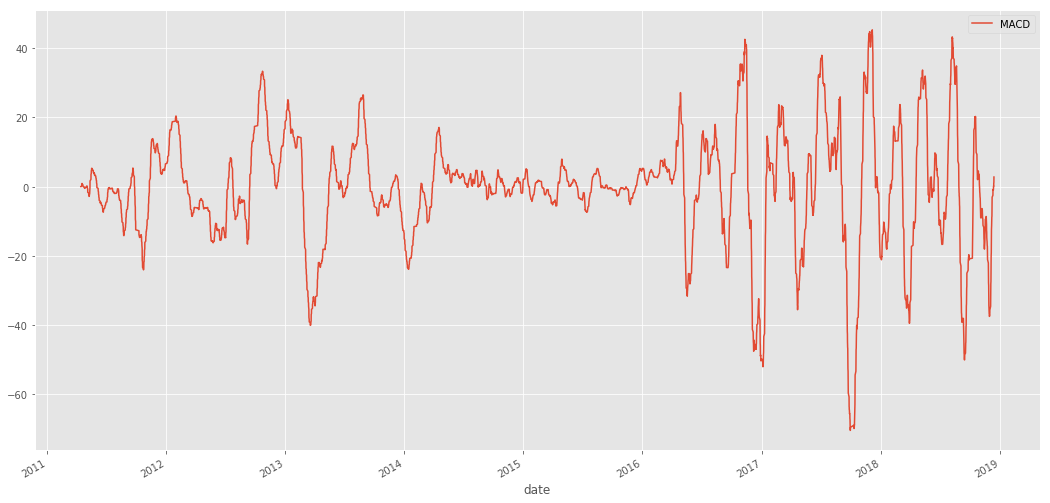

In [39]:
j9000_macd[['MACD']].plot(figsize=(18, 9))

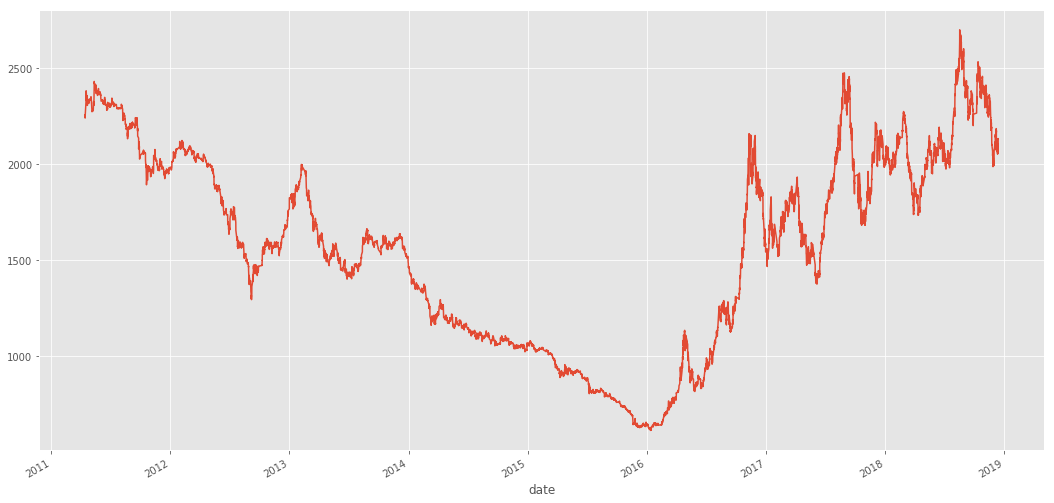

In [42]:
j9000['close'].plot(figsize=(18, 9))